# 2.Logistic Regression
I will implement logistic regression and apply it to two different datasets.

In [2]:
import os
from matplotlib import pyplot
import numpy as np
#import utils
from scipy import optimize
#grader=utils.Grader()
%matplotlib inline


ImportError: DLL load failed while importing _arpack: Nie można odnaleźć określonej procedury.

In [2]:
data= np.loadtxt(os.path.join("Data","ex2data1.txt"),delimiter=',')
X=data[:,:2]
y=data[:,2]

In [3]:
X[:,0]

array([34.62365962, 30.28671077, 35.84740877, 60.18259939, 79.03273605,
       45.08327748, 61.10666454, 75.02474557, 76.0987867 , 84.43281996,
       95.86155507, 75.01365839, 82.30705337, 69.36458876, 39.53833914,
       53.97105215, 69.07014406, 67.94685548, 70.66150955, 76.97878373,
       67.37202755, 89.67677575, 50.53478829, 34.21206098, 77.92409145,
       62.27101367, 80.19018075, 93.1143888 , 61.83020602, 38.7858038 ,
       61.37928945, 85.40451939, 52.10797973, 52.04540477, 40.23689374,
       54.63510555, 33.91550011, 64.17698887, 74.78925296, 34.18364003,
       83.90239366, 51.54772027, 94.44336777, 82.36875376, 51.04775177,
       62.22267576, 77.19303493, 97.77159928, 62.0730638 , 91.5649745 ,
       79.94481794, 99.27252693, 90.54671411, 34.52451385, 50.28649612,
       49.58667722, 97.64563396, 32.57720017, 74.24869137, 71.79646206,
       75.39561147, 35.28611282, 56.2538175 , 30.05882245, 44.66826172,
       66.56089447, 40.45755098, 49.07256322, 80.27957401, 66.74

### 2.1 Visualizing the data

Text(0, 0.5, '2 score')

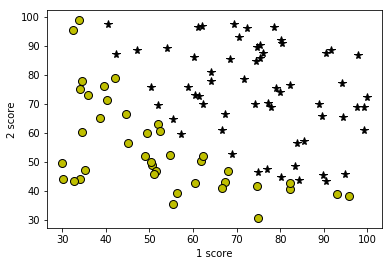

In [4]:

def plotData(X,y):
    fig=pyplot.figure()
    
    pyplot.plot(X[y==1,0],X[y==1,1], 'k*',lw=2, ms=8)
    pyplot.plot(X[y==0,0],X[y==0,1],'ko',mfc='y',ms=8)

    
plotData(X,y)
pyplot.xlabel("1 score")
pyplot.ylabel("2 score")



<a id="section1"></a>
### 1.2 Implementation

Llogistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$.

In [5]:
def sigmoid(z):
    z=np.array(z)
    
    g=np.zeros(z.shape)
    
    return (1/(1+np.exp(-z)))

sigmoid([1,2,3,4,5])

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [7]:
print(z)
z=np.array(z)
z.shape

NameError: name 'z' is not defined

In [8]:
sigmoid(0)

0.5

In [10]:
m,n=X.shape

In [11]:
X=np.concatenate([np.ones((100,1)),X],axis=1)

#### 1.2.2 Cost function and gradient
The cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

In [12]:
def costFunction(theta,X,y):
    m=y.size
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    J=0
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J=(1/m) *np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
    grad =(1/m) * (h-y).dot(X)
    
    return J, grad

In [13]:
y.shape

(100,)

In [14]:
h = sigmoid(X.dot(2))
y.dot(np.log(h))
#X.dot(X,y)

array([-7.61568066,  0.        ,  0.        ])

In [15]:
np.dot(y,np.log(h))==y.dot(np.log(h)) #to jest to samo

array([ True,  True,  True])

In [16]:

theta=np.zeros(n+1)
theta
cost, grad=costFunction(theta,X,y)
print("cost {:.3f}".format(cost))
print("grad {:.4f} {}{}".format(*grad))

test_theta=np.array([-23,0.2,0.2])
cost, grad=costFunction(test_theta,X,y)
print("cost {:.3f}".format(cost))
print("grad {:.4f} {}{}".format(*grad))


cost 0.693
grad -0.1000 -12.00921658929115-11.262842205513591
cost 0.293
grad 0.1055 6.2482368689398326.348274675139153


In [17]:
#optimizing theta with scipy
res=optimize.minimize(costFunction,theta,(X,y),
                      jac=True, method='TNC',
                     options={'maxiter':400})

In [18]:
cost=res.fun
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

theta = res.x
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


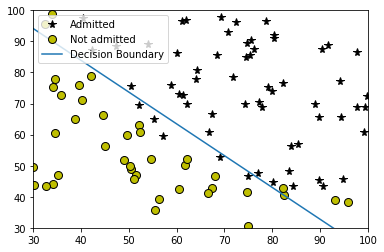

In [19]:
# Plot Boundary
utils.plotDecisionBoundary(plotData, theta, X, y)

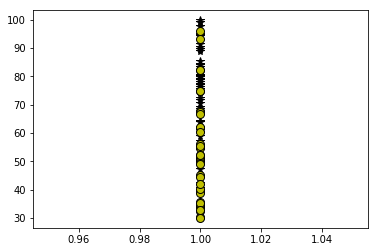

In [20]:
plotData(X,y)

In [21]:
def predict(theta,X):
    return np.round(sigmoid(X.dot(theta.T)))
    

In [22]:
n=np.array([1,45,85])
print("{:.2f}".format(sigmoid(n.dot(theta))))
np.mean(predict(theta,X)==y)

0.78


0.89

## 2 Regularized logistic regression

In [24]:
data=np.loadtxt(os.path.join("Data","ex2data2.txt"),delimiter=',')
X=data[:,0:2]
y=data[:,2]

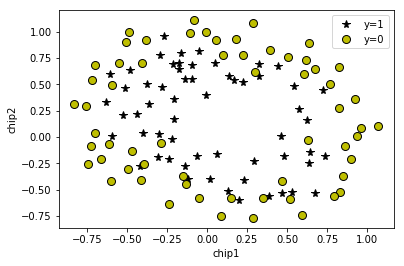

In [25]:
plotData(X,y)
pyplot.xlabel("chip1")
pyplot.ylabel("chip2")
pyplot.legend(['y=1','y=0'],loc='upper right')

In [26]:
X=utils.mapFeature(X[:,0],X[:,1])

### 2.3 Cost function and gradient

Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `costFunctionReg` below to return the cost and gradient.

Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [27]:
def costFunctionReg(theta,X,y,lambda_):
    m=y.size
    J=0
    grad=np.zeros(theta.shape)
    
    
    h= sigmoid(X.dot(theta.T))
    temp=theta
    temp[0]=0
    
    J=(1/m )*np.sum(-y.dot(np.log(h)) -(1-y).dot(np.log(1-h))) + (lambda_/(2*m))*np.sum(theta*theta)
    
    grad=1/m * (h-y).dot(X)
    grad=grad + (lambda_/m)*theta
    return J, grad
    

In [28]:
a=np.array([1,2,3])
a*a
sum(a*a)

14

In [29]:
(X.shape)
theta=np.zeros(X.shape[1])
lambda_=1
cost, grad =costFunctionReg(theta,X,y,lambda_)

In [30]:
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

Cost at initial theta (zeros): 0.693
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]


In [31]:
test_theta=np.ones(X.shape[1])
cost, grad =costFunctionReg(test_theta,X,y,10)
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))

Cost at initial theta (zeros): 3.165
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


66.94915254237289

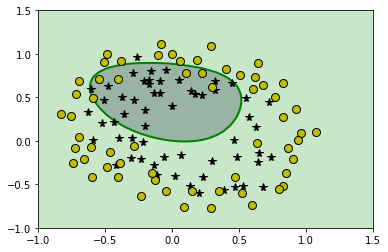

In [32]:
theta=np.zeros(X.shape[1])
lambda_=4.00
options={'maxiter':100}
res=optimize.minimize(costFunctionReg, theta, (X,y, lambda_),jac=True, method='TNC',options=options)

cost=res.fun
theta=res.x
utils.plotDecisionBoundary(plotData,theta,X,y)
p=predict(theta,X)
np.mean(p==y)*100